      GRE            TOEFL        Univ_Rating         SOP           LOR       
 Min.   :290.0   Min.   : 92.0   Min.   :1.000   Min.   :1.0   Min.   :1.000  
 1st Qu.:308.0   1st Qu.:103.0   1st Qu.:2.000   1st Qu.:2.5   1st Qu.:3.000  
 Median :317.0   Median :107.0   Median :3.000   Median :3.5   Median :3.500  
 Mean   :316.8   Mean   :107.4   Mean   :3.087   Mean   :3.4   Mean   :3.453  
 3rd Qu.:325.0   3rd Qu.:112.0   3rd Qu.:4.000   3rd Qu.:4.0   3rd Qu.:4.000  
 Max.   :340.0   Max.   :120.0   Max.   :5.000   Max.   :5.0   Max.   :5.000  
      CGPA          Research      Chance_of_Admit 
 Min.   :6.800   Min.   :0.0000   Min.   :0.3400  
 1st Qu.:8.170   1st Qu.:0.0000   1st Qu.:0.6400  
 Median :8.610   Median :1.0000   Median :0.7300  
 Mean   :8.599   Mean   :0.5475   Mean   :0.7244  
 3rd Qu.:9.062   3rd Qu.:1.0000   3rd Qu.:0.8300  
 Max.   :9.920   Max.   :1.0000   Max.   :0.9700  

GRE           TOEFL     Univ_Rating             SOP             LOR 
      126723.00        42964.00         1235.00         1360.00         1381.00 
           CGPA        Research Chance_of_Admit 
        3439.57          219.00          289.74

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE,1.0000000,0.8359768,0.6689759,0.6128307,0.5575545,0.8330605,0.5803906,0.8026105
TOEFL,0.8359768,1.0000000,0.6955898,0.6579805,0.5677209,0.8284174,0.4898579,0.7915940
Univ_Rating,0.6689759,0.6955898,1.0000000,0.7345228,0.6601235,0.7464787,0.4477825,0.7112503
SOP,0.6128307,0.6579805,0.7345228,1.0000000,0.7295925,0.7181440,0.4440288,0.6757319
LOR,0.5575545,0.5677209,0.6601235,0.7295925,1.0000000,0.6702113,0.3968593,0.6698888
CGPA,0.8330605,0.8284174,0.7464787,0.7181440,0.6702113,1.0000000,0.5216542,0.8732891
Research,0.5803906,0.4898579,0.4477825,0.4440288,0.3968593,0.5216542,1.0000000,0.5532021
Chance_of_Admit,0.8026105,0.7915940,0.7112503,0.6757319,0.6698888,0.8732891,0.5532021,1.0000000


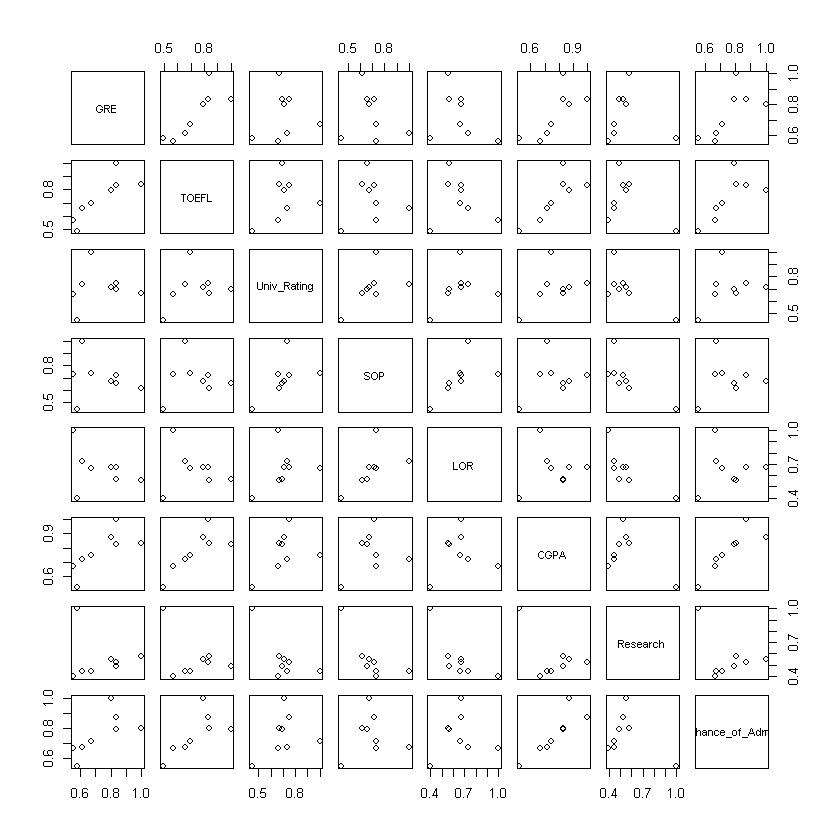

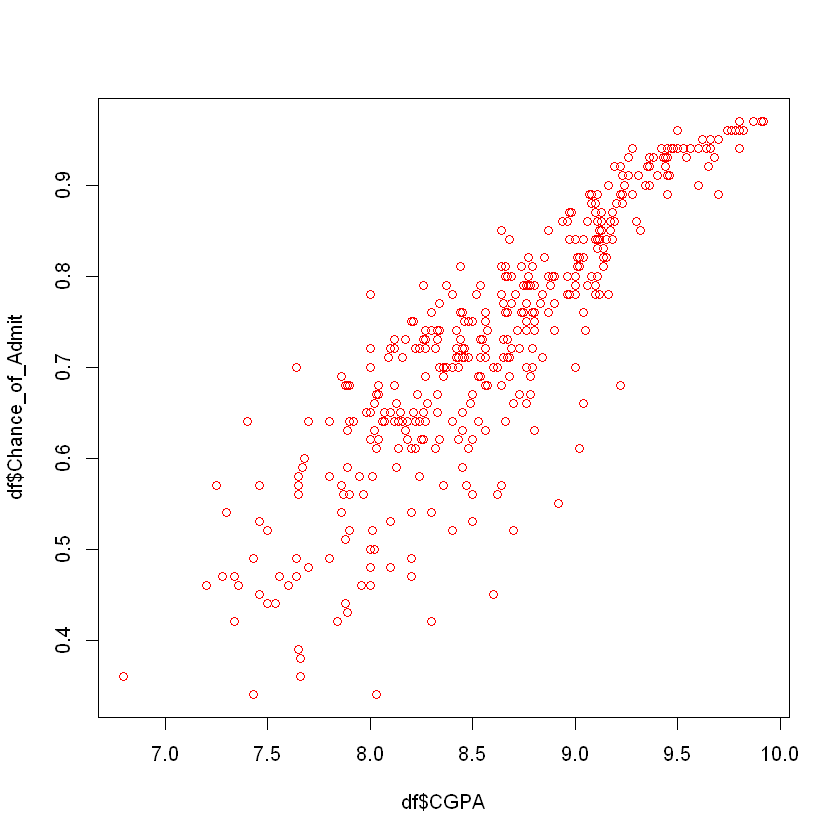

In [25]:
###################################################################################
#                      1. 통계분석 (사용 데이터 : Admission)                  
###################################################################################


#---------------------------------------------------------------------------------
# Q1) 종속변수인 chance_of_admit(입학 허가 확률)와 독립변수(GRE, TOEFL, 
#     Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 
#     수행하고 그래프를 이용하여 분석결과를 설명하시오.
#---------------------------------------------------------------------------------

df = read.csv('./data//모의고사2회/Admission.csv')

summary(df)
#df[, c("GRE", "TOEFL", "Univ_Rating", "SOP", "LOR", "CGPA")]

colSums(df)

# 데이터프레임 내의 상관계수 확인(모든 변수의 상관관계)
cor = cor(df)
cor
# CGPA와 chance_of_admit의 피어슨 상관계수값이 0.87로 가장 큰 양의 상관관계를 갖고 있음
# 어쨌든 모든 독립변수가 양의 상관관계를 약하든 강하든 갖고 있음

# 상관계수 행렬 확인
pairs(cor)

# 독립변수 1개와 종속변수 1개의 점 그래프 표현
plot(df$CGPA, df$Chance_of_Admit, col = "red")


In [23]:
#---------------------------------------------------------------------------------
# Q2) GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 
#     영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.
#---------------------------------------------------------------------------------

model = lm(
    formula = Chance_of_Admit ~ GRE+TOEFL+Univ_Rating+ SOP+ LOR+ CGPA+ Research
    , data = df
)

model.pred = step(model, direction = "both")

# Step:  AIC=-2196.38
# Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research

#               Df Sum of Sq    RSS     AIC
# <none>                     1.6008 -2196.4
# + Univ_Rating  1   0.00464 1.5962 -2195.5
# + SOP          1   0.00024 1.6006 -2194.4
# - TOEFL        1   0.03292 1.6338 -2190.2
# - GRE          1   0.03638 1.6372 -2189.4
# - Research     1   0.03912 1.6400 -2188.7
# - LOR          1   0.09133 1.6922 -2176.2
# - CGPA         1   0.43201 2.0328 -2102.8

# AIC가 가장 낮은 값을 갖는 변수들을 선택하고, 다시 회귀분석 수행 후 결과 해석

model.2 = lm(
    formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research
    , data = df
)

summary(model.2)

# Call:
# lm(formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research, 
#     data = df)

# Residuals:
#       Min        1Q    Median        3Q       Max 
# -0.263542 -0.023297  0.009879  0.038078  0.159897 

# Coefficients:
#               Estimate Std. Error t value Pr(>|t|)    
# (Intercept) -1.2984636  0.1172905 -11.070  < 2e-16 ***
# GRE          0.0017820  0.0005955   2.992  0.00294 ** 
# TOEFL        0.0030320  0.0010651   2.847  0.00465 ** 
# LOR          0.0227762  0.0048039   4.741 2.97e-06 ***
# CGPA         0.1210042  0.0117349  10.312  < 2e-16 ***
# Research     0.0245769  0.0079203   3.103  0.00205 ** 
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Residual standard error: 0.06374 on 394 degrees of freedom
# Multiple R-squared:  0.8027,	Adjusted R-squared:  0.8002 
# F-statistic: 320.6 on 5 and 394 DF,  p-value: < 2.2e-16

# 회귀계수 유의성 확인 => 유의수준 0.05 하에서 회귀 계수별로 유의 확률을 확인했을때 0.05보다 작으므로 회귀 계수는 유의하다.
# 회귀모형 설명력 확인(결정계수) => 결정계수값은 0.80로, 1에 가까울수록 모형의 설명력이 좋다.
# 회귀모형 유의성 확인 => F 검정 통계량 기반으로 계산된 유의확률이 유의수준 0.05보다 작으므로, 통계적으로 유의하다고 볼 수 있다.

Start:  AIC=-2193.9
Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + SOP + LOR + CGPA + 
    Research

              Df Sum of Sq    RSS     AIC
- SOP          1   0.00144 1.5962 -2195.5
- Univ_Rating  1   0.00584 1.6006 -2194.4
<none>                     1.5948 -2193.9
- TOEFL        1   0.02921 1.6240 -2188.6
- GRE          1   0.03435 1.6291 -2187.4
- Research     1   0.03862 1.6334 -2186.3
- LOR          1   0.06620 1.6609 -2179.6
- CGPA         1   0.38544 1.9802 -2109.3

Step:  AIC=-2195.54
Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + LOR + CGPA + Research

              Df Sum of Sq    RSS     AIC
- Univ_Rating  1   0.00464 1.6008 -2196.4
<none>                     1.5962 -2195.5
+ SOP          1   0.00144 1.5948 -2193.9
- TOEFL        1   0.02806 1.6242 -2190.6
- GRE          1   0.03565 1.6318 -2188.7
- Research     1   0.03769 1.6339 -2188.2
- LOR          1   0.06983 1.6660 -2180.4
- CGPA         1   0.38660 1.9828 -2110.8

Step:  AIC=-2196.38
Chance_of_Admit ~ GRE + TOEFL + L


Call:
lm(formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.263542 -0.023297  0.009879  0.038078  0.159897 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.2984636  0.1172905 -11.070  < 2e-16 ***
GRE          0.0017820  0.0005955   2.992  0.00294 ** 
TOEFL        0.0030320  0.0010651   2.847  0.00465 ** 
LOR          0.0227762  0.0048039   4.741 2.97e-06 ***
CGPA         0.1210042  0.0117349  10.312  < 2e-16 ***
Research     0.0245769  0.0079203   3.103  0.00205 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06374 on 394 degrees of freedom
Multiple R-squared:  0.8027,	Adjusted R-squared:  0.8002 
F-statistic: 320.6 on 5 and 394 DF,  p-value: < 2.2e-16


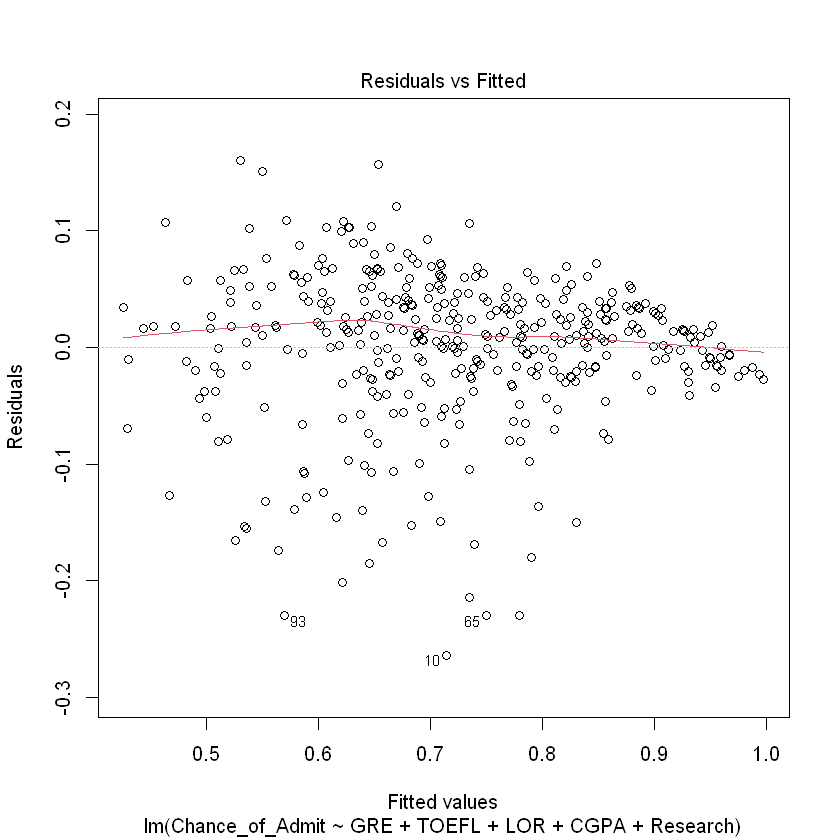

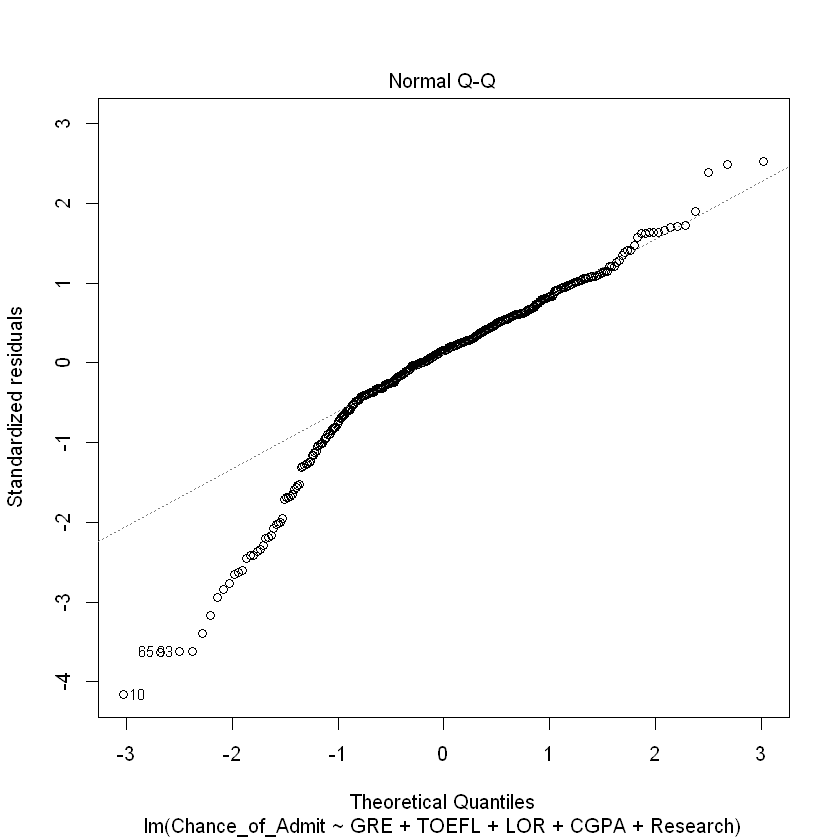

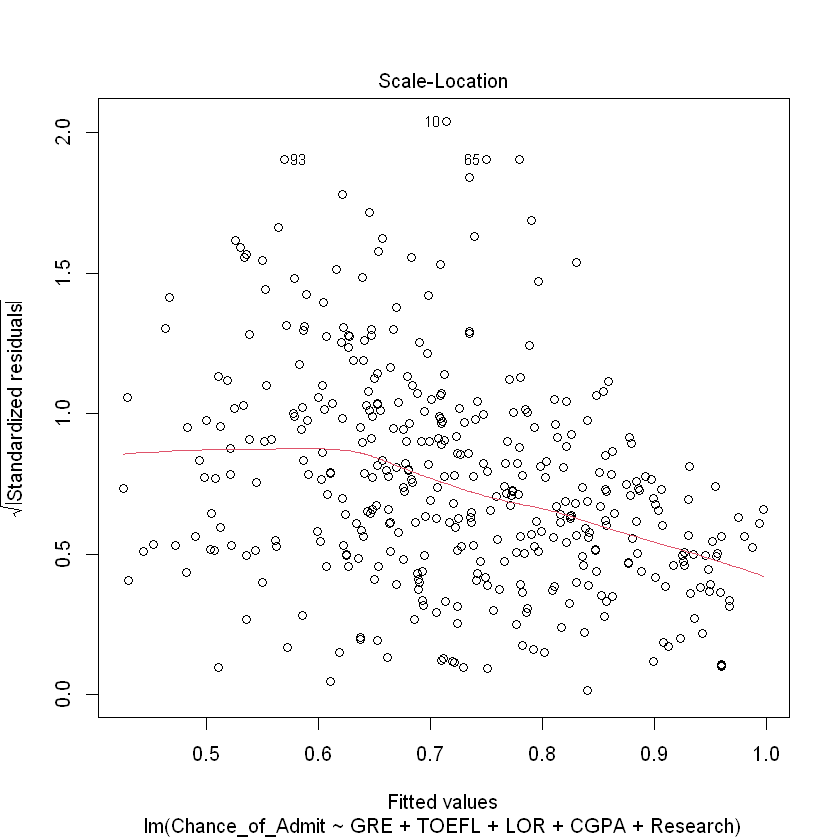

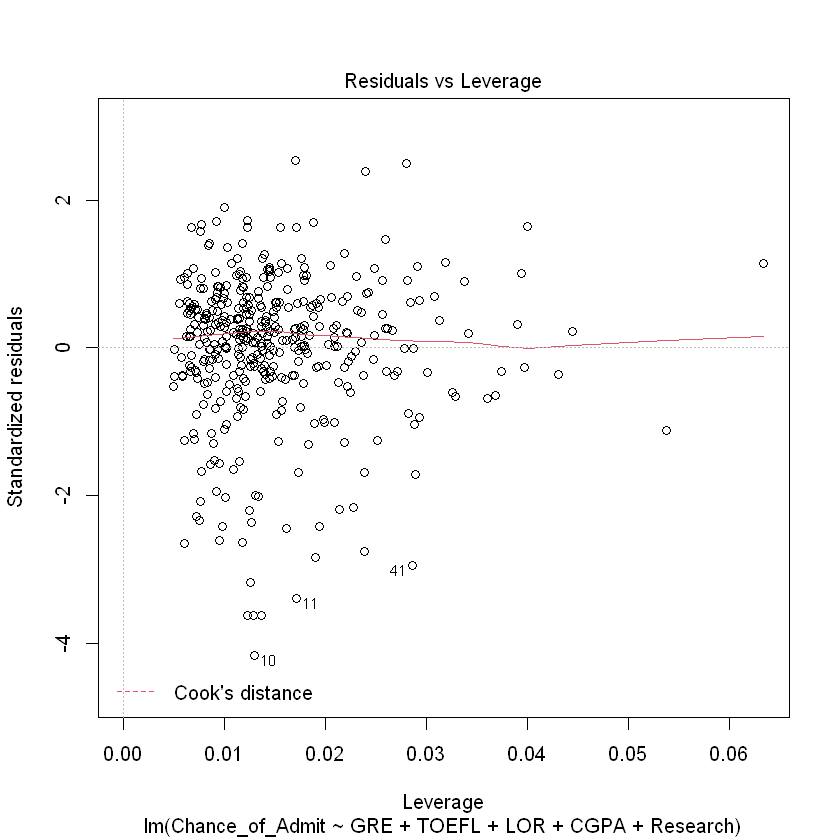

In [24]:
#---------------------------------------------------------------------------
# Q3) 단계 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 
#     잔차분석을 수행하고 결과를 해석하시오. 
#---------------------------------------------------------------------------

# 잔차분석 => 잔차의 정규성, 독립성, 등분산성을 만족시켜야함
# 회귀 모델을 plot 함수에 넣어주면 그래프 4개를 표시해줌
plot(model.2)

# Residuals vs Fitted => 잔차가 정규분포를 따른다는 정규성 가정 만족 확인, 기울기가 0인 직선 형태가 이상적, 완전히 직선 형태는 아니나 어느정도 만족함을 확인
# Normal Q-Q plot 확인 => 표준화된 잔차의 확률도 확인, 점들은 기울기가 1인 직선 형태에 위치하는 것이 이상적, 일부 이탈이 있으나 어느정도 만족함을 확인
# Scale-Location => 기울기가 0인 직선 형태에 위치하는 것이 이상적